In [97]:
#Importing Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

## Background / Motivation

Our team members are all loyal Spotify users, so we want to help Spotify to improve their recommendation algorithm to be better than competing apps, like Apple Music, as well as help smaller artists gain popularity.

## Problem statement 

Our four questions are as follows:

1. Do collaborations and artist followers help increase the song's popularity? 

If the popularity of a collaboration increase as the number of artists listed for a song increase, we can recommend small artists to do more collaboration to boost their popularity. For artist followers, we want to see if there is a positive correlation between then number of followers and the highest charting position/the amount of time that a song would chart. If there is a positive correlation, we can recommend artists to build their popularity through other channels than music such as participating in TV shows.

2. When is the best time to release a song? 

Based on the release date of popular songs, we can recommend artists to release their songs on certain days to increase their chance of their song going viral. Furthermore, Spotify can also try to push songs released on those days that they have a higher correlation to going viral.

3. What song characteristics are most popular in the different languages? 

Spotify can further fine-tune their recommendation algorithm to better recommend songs to audiences that listen to different languages. In addition, artists who produce songs in languages other than English can also cater their music to the preference of the crowd.

4. Does a song’s popularity on Tiktok influence its popularity on Spotify? 

Because 2020 and 2021 are COVID year and the years that TikTok blew up, I thought that there might be some correlation between the popularity of a song on TikTok and their Spotify charting. If they are correlated, artists can popularize their song by making a TikTok dance out of it. Otherwise, they can focus on other ways to promote their music.

## Data sources

We utilized three different CSV files from Kaggle.com. 

1) "Top 200 songs of spotify in 2020-2021". Contains all songs in the weekly top charts of years 2020 and 2021. Columns include song name, audio features, release data, ranking, artist information/followers, genre, and number of time charted.
Link: https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021?resource=download

2) "TikTok Popular Songs 2020". Contains all songs that were popular in the TikTok app during 2020. Columns include song name, audio features, artist, genre, artist and song popularity. 
Link: https://www.kaggle.com/datasets/sveta151/tiktok-popular-songs-2020

3) "TikTok Popular Songs 2021"Contains all songs that were popular in the TikTok app during 2020. Like the previous dataset columns include song name, audio features, artist, genre, artist and song popularity. 
Link: https://www.kaggle.com/datasets/sveta151/tiktok-popular-songs-2021


## Stakeholders

The stakeholders we considered for this project are Spotify and musical artists. Spotify should care about our exploratory data analysis because it can provide them with insight regarding the most popular songs on their platform. They could use these insights to adjust their song recommendation algorithm, enabling them to put Spotify users onto the "next greatest hit" before competing services like Apple Music do.

Meanwhile, musical artists should care about our exploratory data analysis because they can use it to identify common characteristics among top charting songs on Spotify. Once they know what these characteristics are, they can implement them into their own music and increase the similarity between their music and current popular music.

## Data quality check / cleaning / preparation 

In [98]:
#reading in Spotify dataset and identifying count of missing values
spotify_df = pd.read_csv("spotify_dataset.csv")
print('There are', spotify_df.isnull().sum().sum(), 'missing values in the spotify dataset')

There are 0 missing values in the spotify dataset


In [99]:
#reading in 2020 Tiktok dataset and identifying count of missing values
tiktok_20 = pd.read_csv('TikTok_songs_2020.csv')
print('There are', tiktok_20.isnull().sum().sum(), 'missing values in the Tiktok of 2020 dataset')

There are 0 missing values in the Tiktok of 2020 dataset


In [100]:
#reading in 2021 Tiktok dataset and identifying count of missing values
tiktok_21 = pd.read_csv('TikTok_songs_2021.csv')
print('There are', tiktok_21.isnull().sum().sum(), 'missing values in the Tiktok of 2021 dataset')

There are 0 missing values in the Tiktok of 2021 dataset


We started cleaning our data by analyzing if it had null values. While none of the datasets we used had null values, we still encountered some challenges. For example are 75 songs with blank entries for 'genre' (Appendix A). Therefore, we cannot determine the language of the song and sometimes it makes it very hard to analyse the data. As a result, we drop the songs that do not have any associated with them. Value counts and data description overviews can be found in Appendix A (for our Spotify dataset), Appendix B (for Tiktok 2020), and Appendix C (for Tiktok 2021).

#### Elena's Data Cleaning and Preparation

In [101]:
spotify_df.dtypes

Index                         int64
Highest Charting Position     int64
Number of Times Charted       int64
Week of Highest Charting     object
Song Name                    object
Streams                      object
Artist                       object
Artist Followers             object
Song ID                      object
Genre                        object
Release Date                 object
Weeks Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object

Some columns that contained numeric values had the incorrect datatype so we had to convert these values to numeric using a lambda function

In [102]:
# making Artist followers numeric
spotify_df['Artist Followers'] = spotify_df['Artist Followers'].apply(lambda x:pd.to_numeric(x,errors = 'coerce'))

#### Luna's Data Cleaning and Preparation

In [107]:
spotify_df = pd.read_csv('spotify_project.csv')

# Drop the column Index so that there will not be too many indexes later on
spotify_df.drop('Index', axis = 1, inplace = True)

# The stream columns is separating the numbers in group of three by a comma and I am removing that comma
# If I don't do this, it will give me troubles later when I try to convert all the numerical columns into numbers
# [1]
spotify_df.Streams = spotify_df.Streams.str.replace(',', '')

# Sort the values by the highest charting and the number of times charted
# I consider a song of higher charting as the song with the smallest charting position and charted the most number of time
spotify_df.sort_values(by = ['Highest Charting Position', 'Number of Times Charted'], ascending = [True, False], inplace = True)

# Create a ranking so it is easier to compare later
num_list = list(range(1, len(spotify_df) + 1))
spotify_df['Ranking'] = num_list

# Reset the index of my table so I can manipulate them later
spotify_df = spotify_df.reset_index()

# Columns that are numeric in my dataset that is relevent to my question
numeric_columns = ['Streams', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence', 'Ranking']

# I hardcode this but I am dropping all the songs that do not have any value for their numeric columns
spotify_df = spotify_df.drop(labels = [64, 221, 238, 257, 380, 713, 743, 1049, 1138, 1337, 1405])

# Reset the index of the dataframe
spotify_df = spotify_df.reset_index()

# Update the ranking series to only include songs with values for their numerical columns
num_list = list(range(1, len(spotify_df) + 1))
spotify_df['Ranking'] = num_list

# Convert the numerical columns into numbers
for column in numeric_columns:
    spotify_df[column] = spotify_df[column].apply (lambda x: pd.to_numeric(x))
    
# The dataframe now has this weird level_0 and index column, so I just drop it
spotify_df.drop(['level_0', 'index'], axis = 1, inplace = True)

# Filtering the dataset to only include songs from certain countries
# [2]
kpop = spotify_df[spotify_df['Genre'].str.contains('k-pop')]
french = spotify_df[spotify_df['Genre'].str.contains('french')]
latin = spotify_df[spotify_df['Genre'].str.contains('latin')]

# Adding a column to specify the language of the songs
kpop['Language'] = 'Korean'
latin['Language'] = 'Spanish'
french['Language'] = 'French'

# Looking at each language and see which variable is the most correlated with 
kpop_corr = kpop.corrwith(kpop['Ranking']).sort_values()
latin_corr = latin.corrwith(latin['Ranking']).sort_values()
french_corr = french.corrwith(french['Ranking']).sort_values()
corr = pd.concat([kpop_corr, latin_corr, french_corr], axis = 1).rename(columns = {0: 'Kpop', 1: 'Latin', 2: 'French'})

I think that Danceability, Energy, and Acousticness are the most interesting so I decided to present about those variables because Danceability and Energy have some of the highest correlation with Spotify ranking while Acousticness has some of the lower correlation.

In [108]:
# Create a new DataFrame with just the three languages that I choose so I can create a FacetGrid later onabs
international_music = pd.concat([kpop, latin, french], axis=0)

# To look at the correlation between tiktok and spotify ranking, I first merge the two dataframes together
# [3], [4]
spotify_tiktok_20 = pd.merge(spotify_df, tiktok_20, left_on = spotify_df['Song Name'], right_on = tiktok_20['track_name'])
spotify_tiktok_21 = pd.merge(spotify_df, tiktok_21, left_on = spotify_df['Song Name'], right_on = tiktok_21['track_name'])
spotify_tiktok = pd.concat([spotify_tiktok_21, spotify_tiktok_20], axis=0)

# Looking at the correlation between ranking and track_pop in the tiktok popular song dataset
spotify_tiktok_corr = spotify_tiktok.corrwith(spotify_tiktok['Ranking'])

There seem to be little to no correltaion between Tiktok popularity and Spotify ranking because the correlation is about -0.058068

#### Kiara's Data Cleaning and Preparation

In [105]:
#dropping date cells with invalid dates
spotify_df = spotify_df[spotify_df["Release Date"] != " "]

#converting dates to datetime
spotify_df['Release Date'] = pd.to_datetime(spotify_df['Release Date'], format='%Y-%m-%d')

## Exploratory Data Analysis

### Analysis 1
*By Elena Llaguno Cantu*

My question: How does artist followers and collaborations affect song ranking and number of times charted?

For our project there were two main ways of measuring song popularity, either by the number of times the song was in the top charts (greater value means song is more popular) or by its ranking (smaller value means song is more popular as it is higher in ranking).

I first explored wether collaborations affect song popularity. Initially I thought that the number of artists collaborating was an existing column in the dataset. After seeing this was not the case, I decided to make a lambda function that would be applied to the artist column. The function turns the artist names seperated by commas into a list, and then I created a new column using the length value of that list. In other words if the song was made by a single artist the length of the list would be 1, while if it was made by 5 artists there would be five artists seperated by commans in the artist column and after turning it to a list the length of the list would be 5. I then used this column to make a variety of plots to see how the number of collaborators in a song affected its preformance in the top charts. 

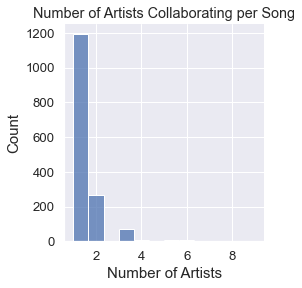

In [133]:
spotify_df = pd.read_csv("spotify_project.csv")

# making artist into lists of artist
spotify_df['Artist'] = spotify_df['Artist'].apply(lambda x : x.split(","))

# create columns number of artists
spotify_df['Number of Artists'] = spotify_df['Artist'].apply(lambda x : len(x))

# Histogram Number of Artists
sns.set(font_scale = 1.2)
a = sns.displot(data = spotify_df, x = 'Number of Artists', kind = 'hist', height = 4)
a.set_axis_labels("Number of Artists", "Count", size = 15).set(title = 'Number of Artists Collaborating per Song')

Conclusion: most of the songs that are charted in the top 200 between 2020-2021 have been done by a single artist, collaborations were not very prevalent. 

<AxesSubplot:xlabel='Number of Artists', ylabel='Number of Times Charted'>

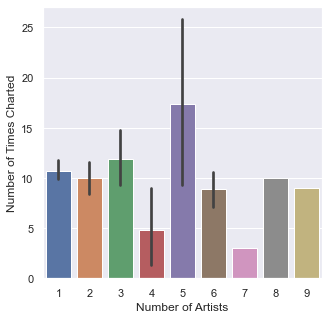

In [131]:
#Visualizing Number of artists and frequency of charted song 
sns.barplot(x = 'Number of Artists', y = 'Number of Times Charted', data = spotify_df)

Conclusion: There is not a clear trend whether collaborating with artists impacts the number of times a song was charted. Number of artists collaborating did not show a big difference on the frequency of song charting. This barplot did show that if we have 5 artists collaborating in the song the number of times the song was charted significantly higher than a single artist, but it does have a larger confidence interval and by seen as the histogram previously there were only a handful of songs with five artists collaborating.

<AxesSubplot:xlabel='Number of Artists', ylabel='Highest Charting Position'>

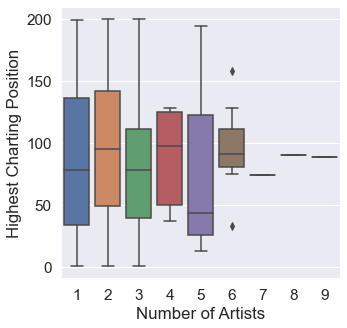

In [146]:
#Visualizing Number of artists and Song's Highest Charting Position
sns.boxplot(data = spotify_df,x = 'Number of Artists', y = 'Highest Charting Position')

Conclusion: There is not a clear trend whether collaborating with artists impacts the charting position of the song. A single artist, two artists, and three artists collaborated there is only slight variation in charting position. However, this barplot did show that if we have 5 artists collaborating in the song the charting position does significantly higher than a single artist, however like previouslt explained this might be a single or two data points. 

I then explored whether artist followers impacted the songs popularity. To do this I just used both columns of the data set to create scatterplots and a trend line. The trend line would indicate if there was a linear corelation. 

Text(0, 0.5, 'Number of Times Charted')

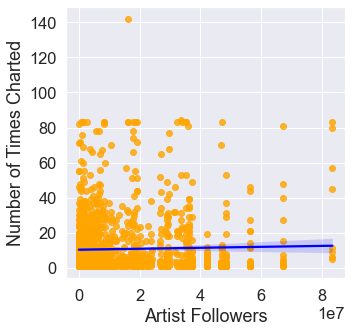

In [147]:
# making Artist followers numeric
spotify_df['Artist Followers'] = spotify_df['Artist Followers'].apply(lambda x:pd.to_numeric(x,errors = 'coerce'))

# Scatterplot to show correlation between artist followers and number of times the song was charted
sns.set(font_scale=1.5)
ax=sns.regplot(x = 'Artist Followers', y = 'Number of Times Charted', data = spotify_df,scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax.set_xlabel('Artist Followers')
ax.set_ylabel('Number of Times Charted')

Conclusion: Artist followers do not really have a correlation to the amount of times the song was charted.

Text(0, 0.5, 'Highest Charting Position')

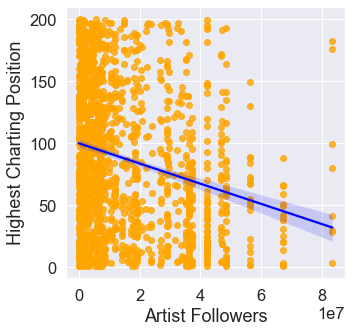

In [148]:
# Scatterplot to show correlation between artist followers and song ranking
sns.set(font_scale=1.5)
ax=sns.regplot(x = 'Artist Followers', y = 'Highest Charting Position', data = spotify_df,scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax.set_xlabel('Artist Followers')
ax.set_ylabel('Highest Charting Position')

Conclusion: Artists with more followers in this dataset tend their songs in higher positions in the charts, but this does not imply causation. 

In order to have more insight on the correlations between artist followers, number of artists collaborating, with song popularity. I then created a heatmap and pairplot.  

<AxesSubplot:>

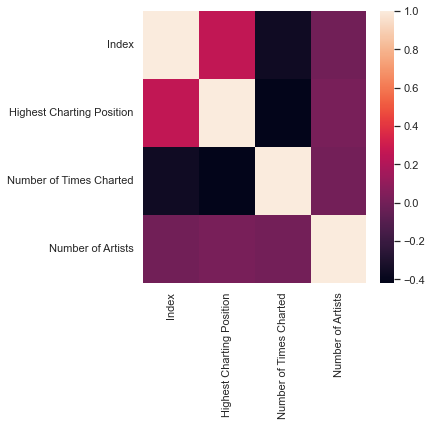

In [140]:
sns.set(font_scale = 1)
sns.heatmap(spotify_df.corr())

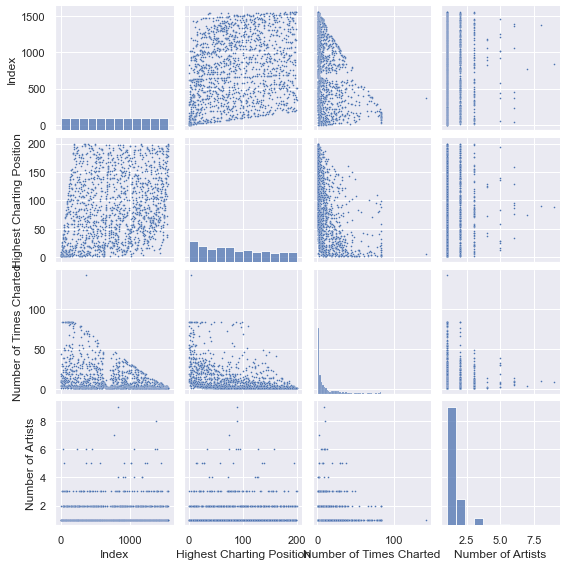

In [138]:
sns.set(font_scale = 1)
sns.pairplot(spotify_df, height = 2, plot_kws={"s": 3})

Conclusion from figure: No clear relationship or non-linear correlation between any of the variables.

### Analysis 2
*By Kiara Villalobos-Hernandez* 

My question: When is the best time to release a song?

To attempt to answer this question, I started by visualizing the number of songs released during each month. It is important to note that not all songs in the top charts for 2020-2021 were released during 2020-2021, so there are songs that were released in any given month during years prior to 2020. 

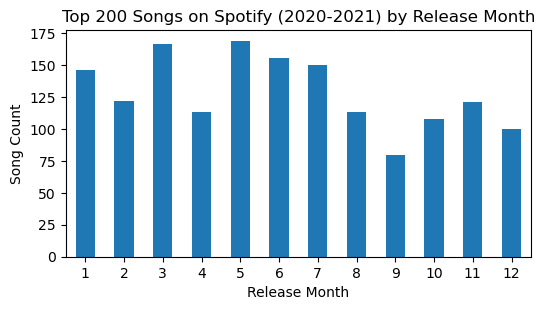

In [47]:
#making Release Month column
spotify_df['Release Month'] = spotify_df['Release Date'].apply(lambda x:x.month)

#grouping by month
month_groupby = spotify_df.groupby(spotify_df['Release Month']).size()

#when are top 200 songs released plot
release_month = plt.figure(figsize=(6, 3), dpi=100)
spotify_df[spotify_df['Highest Charting Position'] >= 0].groupby('Release Month').size().plot.bar(ylabel = 'Song Count')
release_month = plt.title('Top 200 Songs on Spotify (2020-2021) by Release Month')
release_month = plt.xticks(rotation = 0)

Based on this graph, it appears that the releases of top charting songs peak in March and in May. However, I wanted to see if there is a difference between the release months of top 10 songs and the rest of the dataset. To visualize this, I recreated the plot above with a subset of the data containing only songs that charted within the top 10 and recreated it again with a subset containing only songs that charted in the bottom 10 (ranked 190 to 200).

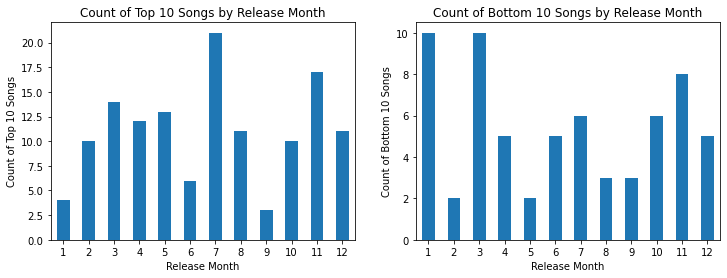

In [48]:
#draws plots side by side
combined_month = plt.subplots(figsize=(12, 4))
combined_month = plt.subplot(1, 2, 1)

#best month to release a song plot
spotify_df[spotify_df['Highest Charting Position'] <= 10].groupby('Release Month').size().plot.bar(ylabel = 'Count of Top 10 Songs')
combined_month = plt.title('Count of Top 10 Songs by Release Month')
combined_month = plt.xticks(rotation = 0)

#worst month to release a song plot
combined_month = plt.subplot(1, 2, 2)
spotify_df[spotify_df['Highest Charting Position'] >= 190].groupby('Release Month').size().plot.bar(ylabel = 'Count of Bottom 10 Songs')
combined_month = plt.title('Count of Bottom 10 Songs by Release Month')
combined_month = plt.xticks(rotation = 0)

Although the plot of the entire dataset shows releases peaking in March and May, the releases peak in July when only songs that made it to the top 10 are considered (left chart). For the bottom ranked songs among the top 200 charts on Spotify, the most common release months were January and March (right chart). This is very different from the common release month for songs that make it to the top 10, July. 

Having identified July as the common release month for top charting songs, I wanted to explore this question deeper and see if there was a certain day of the week when most popular songs were released. I started by plotting the number of top 200 songs against the weekdays they were released. 

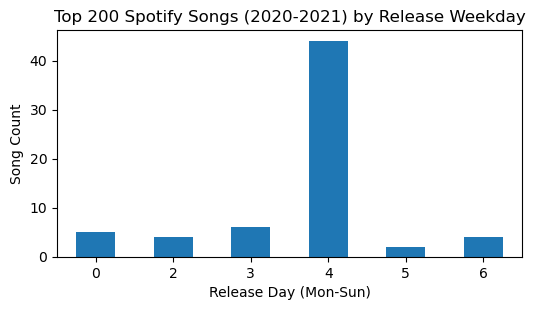

In [49]:
#making Release Day column
spotify_df['Release Day'] = spotify_df['Release Date'].apply(lambda x:x.weekday())

#grouping by weekday
weekday_groupby = spotify_df.groupby(spotify_df['Release Day']).size()

#when (weekday) are songs released plot
release_weekday = plt.figure(figsize=(6, 3), dpi=100)
spotify_df[spotify_df['Highest Charting Position'] >= 190].groupby('Release Day').size().plot.bar(ylabel = 'Song Count')
release_weekday = plt.title('Top 200 Spotify Songs (2020-2021) by Release Weekday')
release_weekday = plt.xlabel('Release Day (Mon-Sun)')
release_weekday = plt.xticks(rotation = 0)

In the graph above, 0 signifies a Monday release and 6 signifies a Sunday release. Overall in the dataset, most songs in the top 200 Spotify charts were released on a Friday. I was curious to see if this was any different for the top and bottom 10 songs, so I created plots for those subsets as well. 

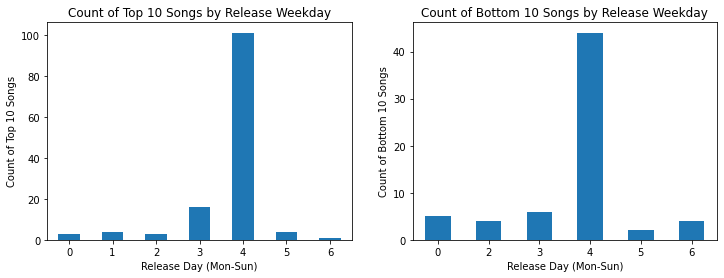

In [53]:
#draws plots side by side
combined = plt.subplots(figsize=(12, 4))
combined = plt.subplot(1, 2, 1)

#best weekday to release a song plot
spotify_df[spotify_df['Highest Charting Position'] <= 10].groupby('Release Day').size().plot.bar(ylabel = 'Count of Top 10 Songs')
combined = plt.title('Count of Top 10 Songs by Release Weekday')
combined = plt.xlabel('Release Day (Mon-Sun)')
combined = plt.xticks(rotation = 0)

#draws plots side by side
combined = plt.subplot(1, 2, 2)
#worst weekday to release a song plot
spotify_df[spotify_df['Highest Charting Position'] >= 190].groupby('Release Day').size().plot.bar(ylabel = 'Count of Bottom 10 Songs')
combined = plt.title('Count of Bottom 10 Songs by Release Weekday')
combined = plt.xlabel('Release Day (Mon-Sun)')
combined = plt.xticks(rotation = 0)

Since all three plots show Friday to be the most common release day, I believe this to be the most common release day for songs regardless of highest charting position. This could be attributed to Friday being the standard release day for songs in the music industry.

Through my exploratory data analysis, I have found that the most highly ranked songs on Spotify are commonly released in July and Friday is the standard release weekday for music, regardless of highest charting position.

### Analysis 3
*By Luna Nguyen*

My question: What song characteristics are most popular in the different languages?

For me, I use the ranking as the indicator of popularity. As I have shown above, I set up the table so that the smaller the ranking, the more popular the song. Therefore, I am looking for a negative correlation between my variables of interest and the popularity of the song of different langauges. 

I first created FacetGrids of the songs' ranking and their different song characteristic grouped into colors based on their languages. I chose to look into Energy, Danceability, and Acoustiness. 

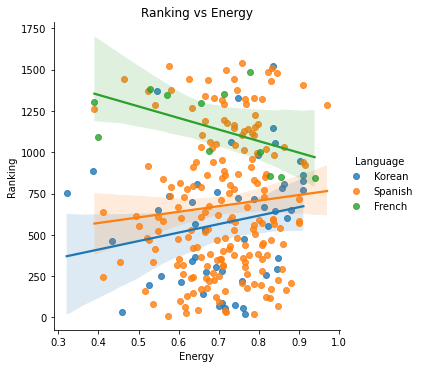

In [140]:
a = sns.FacetGrid(international_music, hue = 'Language', height=5,aspect = 1)
a.map(sns.regplot,'Energy','Ranking')
a.set_axis_labels("Energy", "Ranking")
a.set(title = 'Ranking vs Energy')
a.add_legend()

There is a very clear negative correlation between the song's energy and its charting for French music. However, there is a positive correlation between the energy level and the song's Spotify ranking. This is very surprising for me because I thought that a lot of trendy Korean and Latin music that are trendy are very energetic.

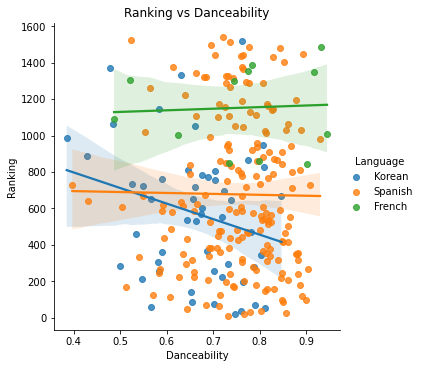

In [139]:
a = sns.FacetGrid(international_music, hue = 'Language', height=5,aspect = 1)
a.map(sns.regplot,'Danceability','Ranking')
a.set_axis_labels("Danceability", "Ranking")
a.set(title = 'Ranking vs Danceability')
a.add_legend()

There is little to no correlation between the danceablity of French and Latin songs and their ranking. This surprises me because I thought that Latin songs are very danceable, but the data suggested otherwise. It makes sense that popular Korean music is very danceable because of the performance nature of the industry.

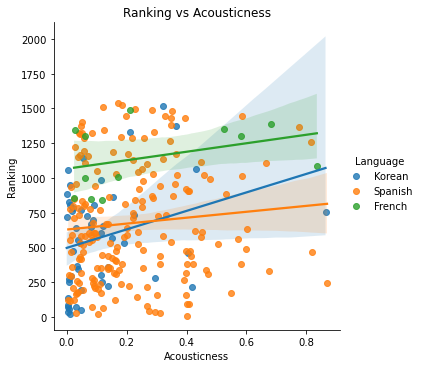

In [137]:
a = sns.FacetGrid(international_music, hue = 'Language', height=5,aspect = 1)
a.map(sns.regplot,'Acousticness','Ranking')
a.set_axis_labels("Acousticness", "Ranking")
a.set(title = 'Ranking vs Acousticness')
a.add_legend()

There is a positive correlation between the song's ranking and their acoustiness of all languages. Therefore, it can be inferred that acoustic music is not as popular regardless of the language

### Analysis 4
*By Luna Nguyen*

My question: Does a song's popularity on Tiktok influence its popularity on Spotify?

Since our dataset is from the year 2020-2021, I immediately thought of Tiktok. Since those are COVID years and Tiktok blew up during this same time, I hypothesized that the higher the Tiktok popularity, the more popular the song would be on Spotify. Differ from the Spotify dataset, the Tiktok dataset is set up so that the more popular the song is, the higher the track_pop will be. Therefore, we are looking for a negative correlation between the two variables if my hypothesis is correct. 

Text(0.5, 1.0, 'Tiktok Popularity vs Spotify Ranking')

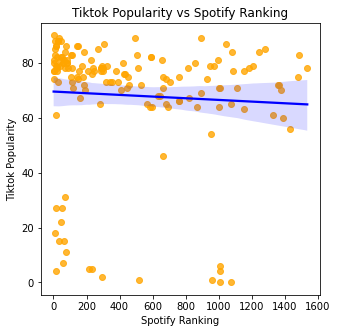

In [135]:
# Plotting the scatterplot of the titkok popularity and spotify ranking
plt.rcParams["figure.figsize"] = (5,5)
ax = sns.regplot(x = 'Ranking', y = 'track_pop', data = spotify_tiktok, scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
ax.set_xlabel('Spotify Ranking')
ax.set_ylabel('Tiktok Popularity')
ax.set_title('Tiktok Popularity vs Spotify Ranking', size = 12)

There is little to no correlation between the song's Spotify ranking and its Tiktok popularity.

## Conclusions

Through exploring the figures and data when answering the first question, it was clear that a factor that is highly correlated with the charting position of a song is artist followers. Collaborations with other artists, on the other hand, were not as relevant among top 200 weekly songs. We can see that as the artist followers increase, their number of times charted does not increase as much but their highest charting position increases drastically. This could suggest that bigger artists with more followers have a lot of fans, but not many loyal fans. Therefore, when these artist first release their music, the song immediately become popular, but people are quick to switch to the next new song after around a week or so. 

Songs that chart within the top 10 on Spotify are commonly released on Fridays. This aligns with the music industry standard. However, we also found that top 10 songs on Spotify are commonly released in July. This could be due to the high volume of music festivals occurring during this month, which allow newly released music to gain exposure.

When answering the third question we found that energy is most highly correlated to the popularity of French music while danceability is most highly correlated to the popularity of Korean music. This is surprising because we thought that a lot of popular Latin and Korean music are also very energetic and Latin music is also very danceable. However, our dataset has proven otherwise. Acousticness is not very popular regardless of the language. 

Lastly, TikTok popularity has little to no correlation with the song’s Spotify charting. This could be because people who listen to a song on TikTok just choose to listen to that short section of the song instead of trying to search for the whole song. Furthermore, due to the rise of the quick-fix culture, people are less likely to be patient to listen to the whole song and they are more likely to just listen to the part that they like on Tiktok. Furthermore, because Tiktok just plays one section of a song over and over again, maybe people grow sick of a song before they can even search for that song on Spotify.

In general, a song that is highly charted in Spotify's weekly top charts has certain characteristics like high artist followers, released on similar dates (most of them on Fridays and July), and most likely appeals to their target audience's preferences in energy, danceability, and acousticness.

## Recommendations to stakeholder(s)

Question 1 recommendation: Artists should focus on gaining artists followers on spotify as artist followers have a corrleation with the positioning of the song in the charts. Specifically, artists with more 60 million followers often had their songs in the top 50 charts. 

Question 2 recommendation: Spotify should pay extra attention to songs released in July because it is a common release month for songs with the highest Spotify charting positions. Meanwhile, artists should aim to release music during this month because the popularity of music festivals can help them give their new music exposure if they are able to perform in them.

Question 3 recommendation: Spotify can promote more danceable songs to users to tend to listen to Korean music while pushing energetic songs for users who listen to French music. Similarly, artists who want to target the Korean audience should produce more danceable songs and those aiming for the French audience should produce more energetic songs.

Question 4 recommendations: Because TikTok  popularity has little to no correlation with the song’s Spotify charting, Spotify does not have to aim to promote TikTok famous songs. For artists, instead of trying to create a TikTok dance out of their songs, they can focus on popularizing their music through other channels such as talk shows.

### Limitations

We compare top charting Spotify songs to other top charting Spotify songs, so our findings cannot be extrapolated to all songs overall.

Question 2: One limitation is because we did not group our best day of the week for music release by month, we are not sure if the popular Friday releases happen in July or not. 

Question 3: We assumed that songs with the highest ranking and for the longest number of weeks are the most popular so we rank them higher. However, this might not be Spotify's method of ranking songs to determine popularity. Furthermore, there are not too many foreign music on the top 200 chart so it allows each song values to have a very big impact on the correlation. If we have access to the top 200 songs each those countries/languages, then the analysis will be much cleaner.

Question 4: When we merge the Tiktok and Spotify datasets, we did not account for the potential overlap of songs that are trending both years. Therefore, it could be that a song does really well 2020, but this information is displayed by the not-as-great charting podition in the year 2021 as that dataset is merged later. 

## References {-}

[1] The Pandas Development Team. Pandas: Pandas, 2020. Supplied as additional material https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html

[2] The Pandas Development Team. Pandas: Pandas, 2020. Supplied as additional material https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html

[3] The Pandas Development Team. Pandas: Pandas, 2020. Supplied as additional material https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

[4] The Pandas Development Team. Pandas: Pandas, 2020. Supplied as additional material https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

## Appendix {-}

### Appendix A
Value counts and .describe() for Spotify Dataset

In [67]:
spotify_df['Week of Highest Charting'].value_counts().head(3)

2019-12-27--2020-01-03    89
2020-12-18--2020-12-25    68
2020-01-03--2020-01-10    51
Name: Week of Highest Charting, dtype: int64

In [68]:
spotify_df['Song Name'].value_counts().head(3)

Beggin'                      1
Ignorantes                   1
Creature (feat. Swae Lee)    1
Name: Song Name, dtype: int64

In [69]:
spotify_df['Artist'].value_counts().head(3)

Taylor Swift     52
Lil Uzi Vert     32
Justin Bieber    32
Name: Artist, dtype: int64

In [70]:
spotify_df['Song ID'].value_counts().head(3)

                          11
5uEYRdEIh9Bo4fpjDd4Na9     3
4S2uhQE8L9V6p7rj7SiauJ     2
Name: Song ID, dtype: int64

In [71]:
spotify_df['Genre'].value_counts().head(3)

[]                                       75
['dance pop', 'pop', 'post-teen pop']    71
['latin', 'reggaeton', 'trap latino']    63
Name: Genre, dtype: int64

In [72]:
spotify_df['Release Date'].value_counts().head(3)

2020-01-17    34
2020-02-14    28
2020-03-06    28
Name: Release Date, dtype: int64

In [73]:
spotify_df['Weeks Charted'].value_counts().head(3)

2020-12-18--2020-12-25    32
2020-01-17--2020-01-24    24
2020-02-14--2020-02-21    20
Name: Weeks Charted, dtype: int64

In [74]:
spotify_df['Chord'].value_counts().head(3)

C#/Db    214
C        155
B        141
Name: Chord, dtype: int64

In [82]:
spotify_df.describe()

,Index,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380
std,449.322824,58.147225,16.360546
min,1.000000,1.000000,1.000000
25%,389.750000,37.000000,1.000000
50%,778.500000,80.000000,4.000000
75%,1167.250000,137.000000,12.000000
max,1556.000000,200.000000,142.000000


### Appendix B
Value counts and .describe() for 2020 Tiktok Dataset

In [83]:
tiktok_20['track_name'].value_counts().head(3)

Like That (feat. Gucci Mane)      2
No Idea                           2
Rags2Riches 2 (feat. Lil Baby)    2
Name: track_name, dtype: int64

In [84]:
tiktok_20['artist_name'].value_counts().head(3)

Doja Cat     10
Lady Gaga     5
Kesha         4
Name: artist_name, dtype: int64

In [85]:
tiktok_20['album'].value_counts().head(3)

Hot Pink                       6
Cannibal (Expanded Edition)    3
Currents                       2
Name: album, dtype: int64

In [86]:
tiktok_20['mode'].value_counts().head(3)

1    156
0    136
Name: mode, dtype: int64

In [87]:
tiktok_20['key'].value_counts().head(3)

1    43
0    37
7    27
Name: key, dtype: int64

In [88]:
tiktok_20['time_signature'].value_counts().head(3)

4    278
3     11
1      2
Name: time_signature, dtype: int64

In [89]:
tiktok_20.describe()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,292.000000,292.00000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,67.318493,61.19863,0.725404,0.612855,-6.884469,0.534247,5.041096,0.150245,0.232500,0.028654,0.187648,0.545168,119.770538,3.945205,192805.212329
std,16.571140,20.78498,0.143129,0.163366,2.697198,0.499682,3.689638,0.150504,0.255970,0.114149,0.141949,0.212719,25.609372,0.316354,55763.157757
min,0.000000,0.00000,0.174000,0.045800,-23.928000,0.000000,0.000000,0.025900,0.000041,0.000000,0.021900,0.038900,71.994000,1.000000,37632.000000
25%,57.750000,57.00000,0.651000,0.489250,-8.369750,0.000000,1.000000,0.045200,0.027050,0.000000,0.095175,0.389750,100.064000,4.000000,158673.000000
50%,69.000000,66.00000,0.734500,0.631000,-6.523000,1.000000,5.000000,0.084650,0.129000,0.000000,0.124000,0.554500,119.967000,4.000000,191130.000000
75%,80.000000,74.00000,0.831750,0.729000,-4.983500,1.000000,8.000000,0.217000,0.329250,0.000196,0.251000,0.712750,131.334750,4.000000,221394.750000
max,95.000000,90.00000,0.980000,0.955000,-2.607000,1.000000,11.000000,0.907000,0.974000,0.856000,0.944000,0.967000,210.857000,5.000000,467587.000000


### Appendix C
Value counts and .describe() for 2021 Tiktok Dataset

In [90]:
tiktok_21['track_name'].value_counts().head(3)

Love Me                      2
STAY (with Justin Bieber)    1
PYRO                         1
Name: track_name, dtype: int64

In [91]:
tiktok_21['artist_name'].value_counts().head(3)

Justin Bieber     7
Doja Cat          5
Olivia Rodrigo    4
Name: artist_name, dtype: int64

In [92]:
tiktok_21['album'].value_counts().head(3)

Planet Her    4
Positions     3
SOUR          3
Name: album, dtype: int64

In [93]:
tiktok_21['mode'].value_counts()

1    118
0     72
Name: mode, dtype: int64

In [94]:
tiktok_21['key'].value_counts().head(3)

1    33
0    22
8    21
Name: key, dtype: int64

In [95]:
tiktok_21['time_signature'].value_counts().head(3)

4    178
3      8
5      3
Name: time_signature, dtype: int64

In [96]:
tiktok_21.describe()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,70.878947,65.578947,0.708105,0.672700,-5.929774,0.621053,4.894737,0.093522,0.204124,0.007814,0.176361,0.563204,125.533495,3.957895,194612.563158
std,15.301246,22.917417,0.116882,0.149721,2.305945,0.486407,3.661537,0.092847,0.222932,0.052535,0.129755,0.213829,26.832668,0.322549,38899.194512
min,0.000000,0.000000,0.386000,0.184000,-17.667000,0.000000,0.000000,0.025900,0.000079,0.000000,0.026500,0.034800,65.043000,1.000000,80118.000000
25%,63.000000,63.000000,0.651000,0.578250,-7.040750,0.000000,1.000000,0.041825,0.020350,0.000000,0.093225,0.412750,107.978000,4.000000,169067.000000
50%,73.500000,73.000000,0.710000,0.692000,-5.703000,1.000000,5.000000,0.055700,0.119000,0.000000,0.118000,0.584000,122.975000,4.000000,195806.500000
75%,82.000000,79.000000,0.784250,0.790000,-4.322750,1.000000,8.000000,0.096925,0.320250,0.000036,0.240000,0.750750,138.041750,4.000000,218103.500000
max,95.000000,91.000000,0.949000,0.989000,-1.609000,1.000000,11.000000,0.505000,0.837000,0.611000,0.825000,0.970000,206.072000,5.000000,344571.000000
